Andre Londono
Dis 102

# Homework 5: Statistics

##### ** Submit this notebook to bourses to receive a credit for this assignment. **

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook [email_name]_HW05.ipynb, where [email_name] is the part of your UCB email address that precedes "@berkeley.edu" 

## Problem 1: Gamma-ray peak

[Some of you may recognize this problem from Advanced Lab's Error Analysis Exercise. That's not an accident.]

You are given a dataset (peak.dat) from a gamma-ray experiment consisting of ~1000 hits. Each line in the file corresponds to one recorded gamma-ray event, and stores the the measured energy of the gamma-ray. We will assume that the energies are randomly distributed about a common mean, and that each event is uncorrelated to others. Read the dataset from the enclosed file and:
1. Produce a histogram of the distribution of energies. Choose the number of bins wisely, i.e. so that the width of each bin is smaller than the width of the peak, and at the same time so that the number of entries in the most populated bin is relatively large. Since this plot represents randomly-collected data, plotting error bars would be appropriate.
1. Compute the mean and standard deviation of the distribution of energies and their statistical uncertainties. 
1. Fit the distribution to a Gaussian function, and compare the parameters of the fitted Gaussian and their uncertainties with the mean and standard deviation computed above
1. How consistent is the distribution with a Gaussian? In other words, compare the histogram from (1) to the fitted curve, and compute a goodness-of-fit value, such as $\chi^2$/d.f.


Mean =  1.202680265
Standard Deviation =  0.103785124606
Statistical Uncertainty =   9.43398113206 

Gaussian a =77.304+/-2.498
Gaussian mu= 1.191+/-0.004
Sigma = 0.103+/-0.004 

Mean =  1.202680265
Sigma  =  0.103785124606
Chi Square = 129869.159769
Since Chi Square is large that means the integral of the chi square will result in a nearly 0 P value.
So there is greater confidence that the observed deviation from the null hypothesis is significant.


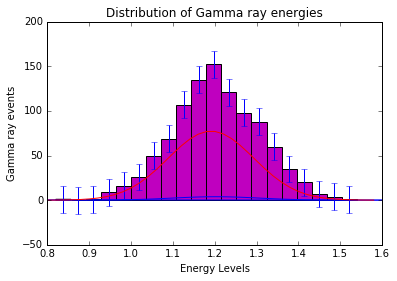

In [181]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.optimize as fitter
%matplotlib inline

#weight = 1/sigma
#compute the uncertainty of the mean
#for #2 just compute standard deviation

#1
data = np.loadtxt('peak.dat' , unpack= True)
n, bins, patches = plt.hist(data, 20, color = 'm')
mid = 0.5*(bins[1:] + bins[:-1])
plt.errorbar(mid, n, yerr=9, fmt='none')


#2
print 'Mean = ',  sp.mean(data)
print 'Standard Deviation = ', sp.std(data) 
x = np.linspace(.8, 1.6, 100)
par = norm.fit(data)
pdf_fitted = norm.pdf(x,loc=par[0],scale=par[1])
pdf = norm.pdf(x)

plt.title('Distribution of Gamma ray energies')
plt.plot(x,pdf_fitted, 'b', x ,pdf,'b-')
plt.ylabel('Gamma ray events')
plt.xlabel('Energy Levels')


y, bin_edges = np.histogram(data, range=(.8 ,1.6),bins=40)
x = [0.5*(bin_edges[1:] + bin_edges[:-1])]
x1 = bin_edges[0:len(bin_edges)-1]


ey = np.sqrt(y)
ey = [max(error,1) for error in ey]
print "Statistical Uncertainty =  ", max(ey) , '\n'

#3
def model(x, a, mu, sigma):
    return a*np.exp(-((x-mu)**2)/(2*sigma**2))


par0 = np.array([600.0, 1.0, .1])
par, cov = fitter.curve_fit(model, x1, y, par0)

yfit = par[0] * np.exp(-((x1-par[1])**2)/(2*par[2]**2))
plt.plot(x1, yfit, 'r')


a = par[0]
ea = np.sqrt(cov[0,0])
print 'Gaussian a ={0:6.3f}+/-{1:5.3f}'.format(a,ea)
b = par[1]
eb = np.sqrt(cov[1,1])
print 'Gaussian mu={0:6.3f}+/-{1:5.3f}'.format(b,eb)
c = par[2]
ec = np.sqrt(cov[2,2])
print 'Sigma ={0:6.3f}+/-{1:5.3f}'.format(c,ec) , '\n'

N = len(data)
mean = sp.mean(data)
print 'Mean = ',  mean
sigma = sp.sqrt(np.sum((data-mean)**2)/len(data)) 
print 'Sigma  = ', sigma



#4
eMean = sigma/np.sqrt(N)
eSigma=np.sqrt((np.sum((data-mean)**4)/N-(N-3)/(N-1)*sigma**4)/N)

chi_squared = np.sum(((model(x1, *par)-y)/sigma)**2)
print 'Chi Square =', chi_squared
print 'Since Chi Square is large that means the integral of the chi square will result in a nearly 0 P value.'
print 'So there is greater confidence that the observed deviation from the null hypothesis is significant.'
#print 'Max-likelihood estimate of mean={0:4.2f}+/-{1:4.2f}'.format(mean,eMean)
#print 'Max-likelihood estimate of sigma={0:4.2f}+/-{1:4.2f}'.format(sigma,eSigma)



plt.show()

## Problem 2: Optical Pumping experiment

One of the experiments in the 111B (111-ADV) lab is the study of the optical pumping of atomic rubidium. In that experiment, we measure the resonant frequency of a Zeeman transition as a function of the applied current (local magnetic field). Consider a mock data set:
<table border="1" align="center">

<tr>
<td>Current <i>I</i> (Amps)
</td><td>0.0 </td><td> 0.2 </td><td> 0.4 </td><td> 0.6 </td><td> 0.8 </td><td> 1.0 </td><td> 1.2 </td><td> 1.4 </td><td> 1.6 </td><td> 1.8 </td><td> 2.0 </td><td> 2.2
</td></tr>
<tr>
<td>Frequency <i>f</i> (MHz)
</td><td> 0.14 </td><td> 0.60 </td><td> 1.21 </td><td> 1.94 </td><td> 2.47 </td><td> 3.07 </td><td> 3.83 </td><td> 4.16 </td><td> 4.68 </td><td> 5.60 </td><td> 6.31 </td><td> 6.78
</td></tr></table>

1. Plot a graph of the pairs of values. Assuming a linear relationship between $I$ and $f$, determine the slope and the intercept of the best-fit line using the least-squares method with equal weights, and draw the best-fit line through the data points in the graph.
1. From what s/he knows about the equipment used to measure the resonant frequency, your lab partner hastily estimates the uncertainty in the measurement of $f$ to be $\sigma(f) = 0.01$ MHz. Estimate the probability that the straight line you found is an adequate description of the observed data if it is distributed with the uncertainty guessed by your lab partner. (Hint: use scipy.stats.chi2 class to compute the quantile of the chi2 distribution).  What can you conclude from these results? 
1. Repeat the analysis assuming your partner estimated the uncertainty to be $\sigma(f) = 1$ MHz. What can you conclude from these results?
1. Assume that the best-fit line found in Part 1 is a good fit to the data. Estimate the uncertainty in measurement of $y$ from the scatter of the observed data about this line. Again, assume that all the data points have equal weight. Use this to estimate the uncertainty in both the slope and the intercept of the best-fit line. This is the technique you will use in the Optical Pumping lab to determine the uncertainties in the fit parameters.
1. Now assume that the uncertainty in each value of $f$ grows with $f$: $\sigma(f) = 0.03 + 0.03 * f$ (MHz). Determine the slope and the intercept of the best-fit line using the least-squares method with unequal weights (weighted least-squares fit)


Slope of fit =  2.64704815078
Intercept of fit =  0.708001053435 

Chi Square with sigma(.01) =  84016.4391507
Since Chi square is very large then the p value will be less than .05 so we can accept this null hypothesis
Chi Square with sigma(1) =  8.40164391507
Since Chi square is smaller then the p value will be larger than .05 so we cannot accept this null hypothesis 

Uncertainty in line =  0.637410683591
Uncertainty in slope = 2.64704815576
Uncertainty in Y intercept 0.708001044563 

Slope for unequal weighted fit 2.93410643624
Y in for unequal weighted fit 0.178953992649


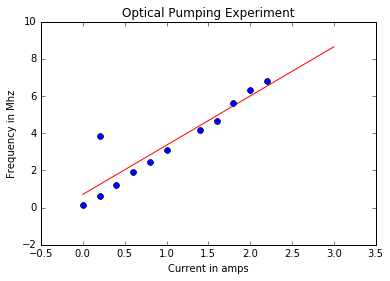

In [9]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.optimize as fitter
%matplotlib inline

#1

I = np.array([0.0, 0.2, 0.4, 0.6,0.8,1.0,.2,1.4,1.6,1.8,2.0,2.2])
f = np.array([0.14,0.60,1.21,1.94,2.47,3.07,3.83,4.16,4.68,5.60,6.31,6.78 ])

def model(x, a, b):
    return a + b*x


par0 = np.array([0.0, 1.0])
par, cov = fitter.curve_fit(model, I, f, p0 = par0, )


xfit = np.linspace(0,3,50)
plt.plot(xfit,model(xfit,par[0],par[1]),'r-')


print 'Slope of fit = ' , par[1]
print 'Intercept of fit = ' , par[0] , '\n'

def determiney(x):
    y = par[1]*(x) + par[0]
    return y


#2
sigma = np.array([.01, .01,.01,.01,.01,.01,.01,.01,.01,.01,.01,.01])
plt.errorbar(I, f, xerr = 0, yerr = sigma,fmt = 'o')

chisquare = np.sum(((model(I, *par)-f)/sigma)**2)
print 'Chi Square with sigma(.01) = ', chisquare
print 'Since Chi square is very large then the p value will be less than .05 so we can accept this null hypothesis'

#3
sigma1 = np.array([1,1,1,1,1,1,1,1,1,1,1,1])
chisquare1 = np.sum(((model(I, *par)-f)/sigma1)**2)
print 'Chi Square with sigma(1) = ', chisquare1
print 'Since Chi square is smaller then the p value will be larger than .05 so we cannot accept this null hypothesis', '\n'
#4
# first calculate uncertainty of the data
#add uncertainty to all the data data y upp y down
#difference in the slopes
downrange = []
upslope = []
downslope = []
for i in range(0,12):
    downrange.append(f[i]-determiney(I[i]))

uncertainty = abs(downrange[1])
print 'Uncertainty in line = ', uncertainty 

for i in range(0,12):
    upslope.append(uncertainty + f[i])
    downslope.append(f[i] - uncertainty)


par1 = np.array([0.0, 1.0])
par2 = np.array([0.0, 1.0])
parUp, cov = fitter.curve_fit(model, I, np.array(upslope) , p0 = par1)
parDown, cov = fitter.curve_fit(model, I, np.array(downslope) , p0 = par2)

UpM = parUp[1]
DownM = parDown[1]
UpY = parUp[0]
DownY = parDown[0]
print 'Uncertainty in slope =', (UpM+DownM) / 2.
print 'Uncertainty in Y intercept', (UpY + DownY) / 2. , '\n'

#5
sigmaf = [] 
for i in range(0,12):
    sigmaf.append(.03 + .03*f[i])

parF, cov = fitter.curve_fit(model, I, f, p0=par1, sigma = sigmaf)
print 'Slope for unequal weighted fit', parF[1]
print 'Y in for unequal weighted fit', parF[0]
plt.scatter(I,f)
plt.xlabel('Current in amps')
plt.ylabel('Frequency in Mhz')
plt.title('Optical Pumping Experiment')
plt.show()